In [287]:
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import *
import numpy as np
import math

## Reading the data and cleaning up

In [193]:
dummy=pd.read_fwf('../data/vertebral_column_data/column_2C.dat',names=['vals'])

In [194]:
df = dummy['vals'].str.split(' ', expand=True)

In [195]:
df=df.rename(columns={0:'PI', 1:'PT', 2:'LLA', 3:'SS', 4:'PR', 5:'GOS',6:'class'})
df.head()

,PI,PT,LLA,SS,PR,GOS,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.3,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [196]:
df['class'].unique()

array(['AB', 'A', 'NO'], dtype=object)

In [197]:
df[df['class']=='A']

,PI,PT,LLA,SS,PR,GOS,class
197,58.83,37.58,125.74,21.25,135.63,117.31,A


In [198]:
df=df.drop(197)

In [199]:
df['class'].unique()

array(['AB', 'NO'], dtype=object)

In [200]:
df['class']=df['class'].replace({'AB':1,'NO':0})

In [201]:
df['PI']=df['PI'].astype(str).astype(float)
df['PT']=df['PT'].astype(str).astype(float)
df['LLA']=df['LLA'].astype(str).astype(float)
df['SS']=df['SS'].astype(str).astype(float)
df['PR']=df['PR'].astype(str).astype(float)
df['GOS']=df['GOS'].astype(str).astype(float)


In [202]:
#Y=df['class']
#Y.head()

In [203]:
#df.drop('class',axis=1,inplace=True)

In [220]:
df

,PI,PT,LLA,SS,PR,GOS,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


## (b)(i) Scatterplots on independant variables

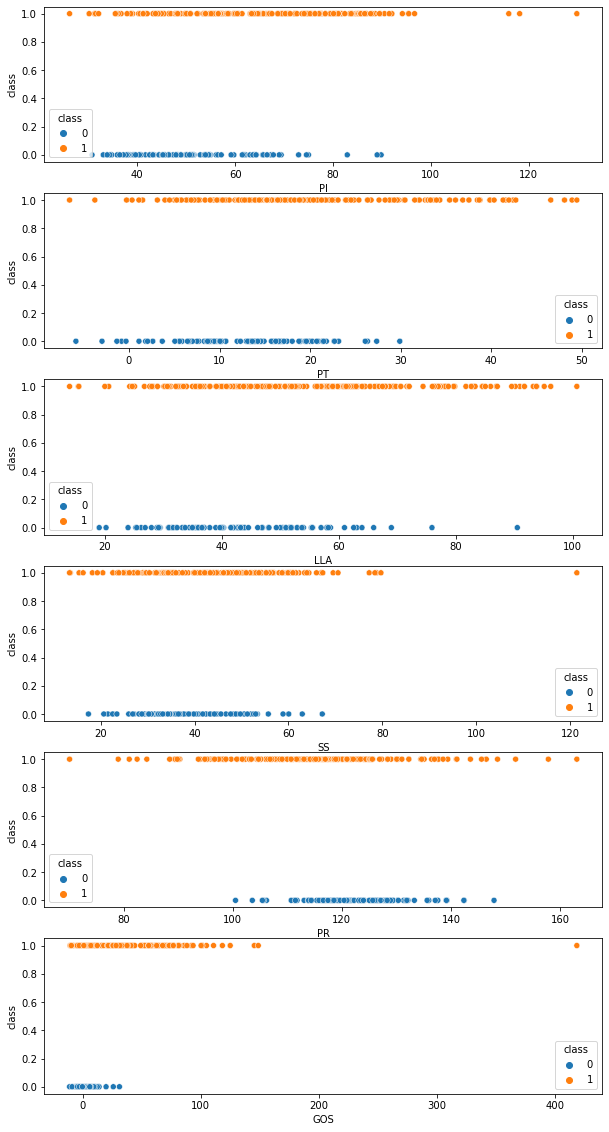

In [206]:
fig, ax = plt.subplots(6,1,figsize=(10,20))
i=0
for col in df.columns[:-1]:
    sns.scatterplot(data=df, x=col, y='class', ax=ax[i], hue=Y, x_bins=10)
    i+=1
plt.show()

## (b)(ii) boxplots on independant variables

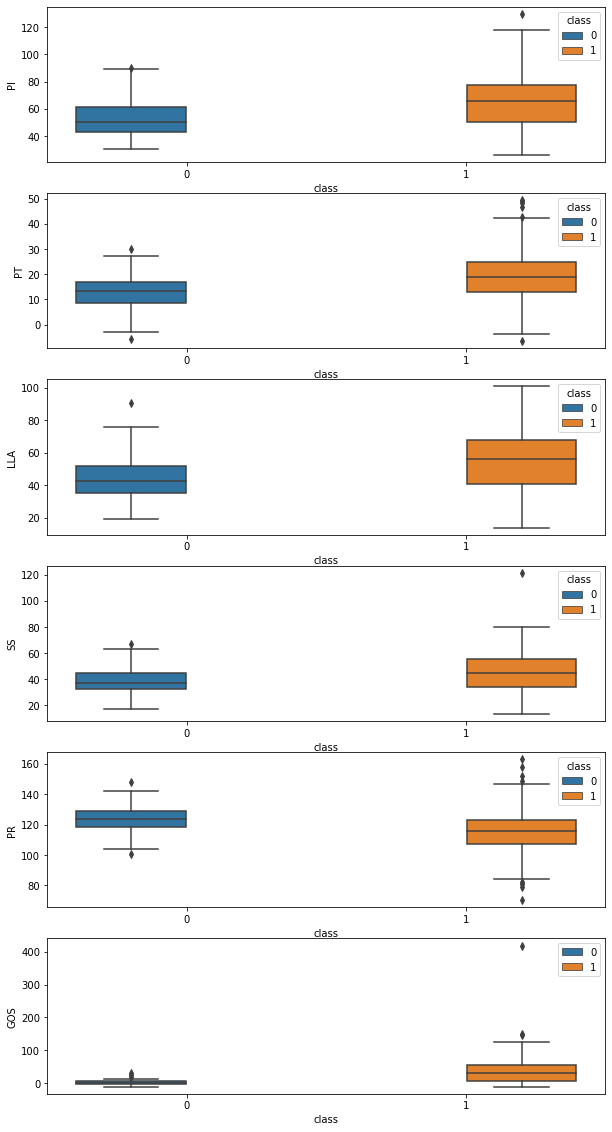

In [207]:
fig, ax = plt.subplots(6,1,figsize=(10,20))
i=0
for col in df.columns[:-1]:
    sns.boxplot(data=df, y=col, x='class', ax=ax[i], hue=Y)
    i+=1
plt.legend(loc="upper right")
plt.show()

## (b)(iii) train test data split

In [222]:
train = pd.concat([df[df['class']==0][:70], df[df['class']==1][:140]], ignore_index=True)
train

,PI,PT,LLA,SS,PR,GOS,class
0,38.51,16.96,35.11,21.54,127.63,7.99,0
1,54.92,18.97,51.60,35.95,125.85,2.00,0
2,44.36,8.95,46.90,35.42,129.22,4.99,0
3,48.32,17.45,48.00,30.87,128.98,-0.91,0
4,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
205,77.12,30.35,77.48,46.77,110.61,82.09,1
206,88.02,39.84,81.77,48.18,116.60,56.77,1
207,83.40,34.31,78.42,49.09,110.47,49.67,1
208,72.05,24.70,79.87,47.35,107.17,56.43,1


In [223]:
test = pd.concat([df[df['class']==0][70:], df[df['class']==1][140:]], ignore_index=True)
test

,PI,PT,LLA,SS,PR,GOS,class
0,50.09,13.43,34.46,36.66,119.13,3.09,0
1,64.26,14.50,43.90,49.76,115.39,5.95,0
2,53.68,13.45,41.58,40.24,113.91,2.74,0
3,49.00,13.11,51.87,35.88,126.40,0.54,0
4,59.17,14.56,43.20,44.60,121.04,2.83,0
...,...,...,...,...,...,...,...
94,80.11,33.94,85.10,46.17,125.59,100.29,1
95,95.48,46.55,59.00,48.93,96.68,77.28,1
96,74.09,18.82,76.03,55.27,128.41,73.39,1
97,87.68,20.37,93.82,67.31,120.94,76.73,1


## (c)(i) KNN with euclidean metric

In [262]:
def predictions_k_neigh(k, data):
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    clf.fit(train.iloc[:,:-1], train.iloc[:,-1:].values.ravel())
    return clf.predict(data)

## (c)(ii) Test all the data in the test database with k nearest neighbors

In [266]:
errors = pd.DataFrame({'error':[],'type':[],'k_neigh':[]})
for i in range(208,-1,-3):
    train_error = 1-accuracy_score(train.iloc[:,-1:], predictions_k_neigh(i, train.iloc[:,:-1]))
    test_error = 1-accuracy_score(test.iloc[:,-1:], predictions_k_neigh(i, test.iloc[:,:-1]))
    k_neigh = int(i)
    errors=pd.concat([errors, pd.DataFrame({'error':[train_error],'type':['train'],'k_neigh':[k_neigh]})], ignore_index=True)
    errors=pd.concat([errors, pd.DataFrame({'error':[test_error],'type':['test'],'k_neigh':[k_neigh]})], ignore_index=True)
errors
    

,error,type,k_neigh
0,0.333333,train,208.0
1,0.303030,test,208.0
2,0.333333,train,205.0
3,0.303030,test,205.0
4,0.333333,train,202.0
...,...,...,...
135,0.121212,test,7.0
136,0.142857,train,4.0
137,0.060606,test,4.0
138,0.000000,train,1.0


<AxesSubplot:xlabel='k_neigh', ylabel='error'>

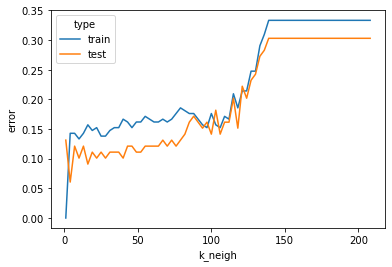

In [267]:
sns.lineplot(data=errors, y='error', x='k_neigh', hue='type')

k*=4 gives the smallest test error along with a reasonable train error

In [269]:
predictions_4_neigh = predictions_k_neigh(i, test.iloc[:,:-1])

In [279]:
conf_matrix = confusion_matrix(test.iloc[:,-1:],predictions_4_neigh)
conf_matrix

array([[20, 10],
       [ 3, 66]], dtype=int64)

In [284]:
print(classification_report(test.iloc[:,-1:],predictions_4_neigh))

              precision    recall  f1-score   support

           0       0.87      0.67      0.75        30
           1       0.87      0.96      0.91        69

    accuracy                           0.87        99
   macro avg       0.87      0.81      0.83        99
weighted avg       0.87      0.87      0.86        99



PRECISION = 0.87

F1_SCORE = 0.91

TRUE POSITIVE RATE/SENSITIVITY = 0.96

TRUE NEGATIVE RATE/SPECIFICITY = 0.67

## (c)(iii) Plot the best test error rate

In [293]:
best_test_error = pd.DataFrame({'test_error':[],'best_k':[],'N':[]})
for N in range(10,220,10):
    min_error = float('inf')
    cur_n = N//3
    cur_best_k = 0
    cur_train = pd.concat([train[train['class']==0][:cur_n], df[df['class']==1][:(N-cur_n)]], ignore_index=True)
    for k in range(1,N,3):
        clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        clf.fit(cur_train.iloc[:,:-1], cur_train.iloc[:,-1:].values.ravel())
        error = 1-accuracy_score(test.iloc[:,-1:], clf.predict(test.iloc[:,:-1]))
        #print(error)
        if min_error>error:
            min_error=error
            cur_best_k = k
    best_test_error=pd.concat([best_test_error, pd.DataFrame({'test_error':[min_error],'best_k':[cur_best_k],'N':[N]})], ignore_index=True)
    
best_test_error


,test_error,best_k,N
0,0.242424,1.0,10.0
1,0.222222,1.0,20.0
2,0.202020,7.0,30.0
3,0.252525,13.0,40.0
4,0.292929,19.0,50.0
5,0.292929,22.0,60.0
6,0.282828,25.0,70.0
7,0.292929,25.0,80.0
8,0.292929,43.0,90.0
9,0.222222,4.0,100.0


<AxesSubplot:xlabel='N', ylabel='test_error'>

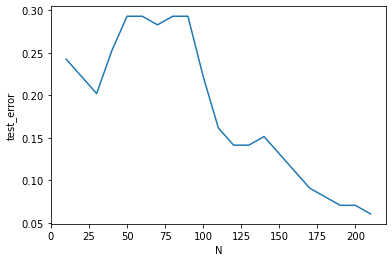

In [295]:
sns.lineplot(data=best_test_error, x='N', y='test_error')

## (d)